In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [16]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [17]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4369, 50), (1093, 50), (4369,), (1093,))

# Training a Machine Learning Model

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True,)

In [21]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [22]:
# score
model.score(x_train,y_train)

0.8542000457770657

In [23]:
# score
model.score(x_test,y_test)

0.8069533394327539

# Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

In [24]:
from sklearn import metrics

In [25]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

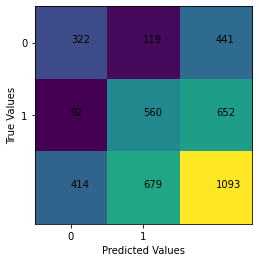

In [26]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [27]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.777778,0.730159,0.753216,441.000000
female,0.824742,0.858896,0.841473,652.000000
accuracy,0.806953,0.806953,0.806953,0.806953
macro avg,0.801260,0.794527,0.797344,1093.000000
weighted avg,0.805793,0.806953,0.805863,1093.000000


In [28]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5949484251809465

# ROC and AUC

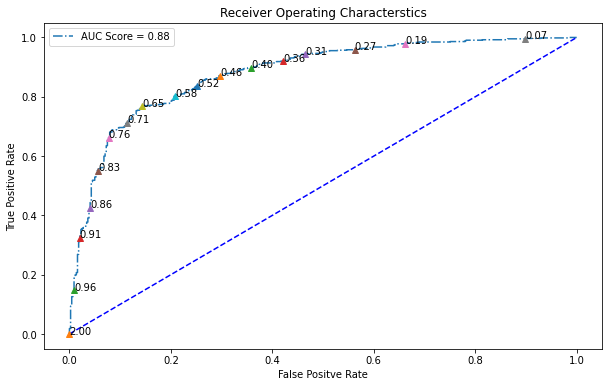

In [29]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

# Hyper Parameter Tuning

In [30]:
model_tune = SVC()

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],
             }

In [33]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

In [34]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.5s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.5s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END ...............C=1, coef0=0, gamma=0.05, kernel=rbf; total time=   1.9s
[CV] END ...............C=1, coef0=0, gamma=0.

[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   1.3s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   1.3s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   1.3s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   1.3s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   0.7s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   0.7s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   0.7s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   0.7s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   0.7s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   1.2s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   1.2s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   1.5s
[CV] END ..............C=1, 

[CV] END ..............C=10, coef0=1, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ..............C=10, coef0=1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.7s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.7s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.5s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.5s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   1.7s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.4s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.7s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END ............C=10, c

[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.0s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.0s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.0s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   1.0s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   2.0s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   1.8s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   1.6s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   1.6s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   1.6s
[CV] END .............C=20, coef0=1, gamma=0.05, kernel=poly; total time=   0.9s
[CV] END .............C=20, coef0=1, gamma=0.05, kernel=poly; total time=   1.0s
[CV] END .............C=20, 

[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.2s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.2s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   1.1s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   1.9s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   2.0s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   1.8s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   1.8s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   1.9s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   1.3s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   1.1s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   1.0s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   1.2s
[CV] END ............C=30, c

[CV] END .............C=50, coef0=0, gamma=0.01, kernel=poly; total time=   1.5s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   1.9s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   1.9s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   1.9s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   1.8s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.3s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.2s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.1s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.1s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   1.1s
[CV] END .............C=50, coef0=0, gamma=0.002, kernel=rbf; total time=   1.7s
[CV] END .............C=50, 

[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   1.8s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   1.6s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   1.7s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   1.8s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   1.4s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   1.5s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   1.3s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   1.9s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   1.4s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END .............C=100,

[CV] END ............C=100, coef0=1, gamma=0.005, kernel=rbf; total time=   3.0s
[CV] END ............C=100, coef0=1, gamma=0.005, kernel=rbf; total time=   2.8s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   4.4s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   3.6s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   4.2s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   3.4s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   3.3s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [35]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.05, 'kernel': 'rbf'}

In [36]:
model_grid.best_score_

0.7782870682230243

In [37]:
# WIth best parameter buil ML Model
model_best = SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

In [38]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.7996340347666971

In [39]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

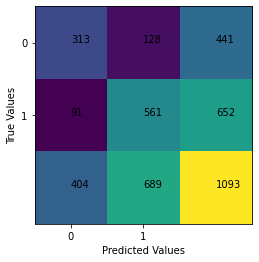

In [40]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [41]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.774752,0.709751,0.740828,441.000000
female,0.814224,0.860429,0.836689,652.000000
accuracy,0.799634,0.799634,0.799634,0.799634
macro avg,0.794488,0.785090,0.788759,1093.000000
weighted avg,0.798298,0.799634,0.798012,1093.000000


In [42]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5780272433835104

# ROC and AUC

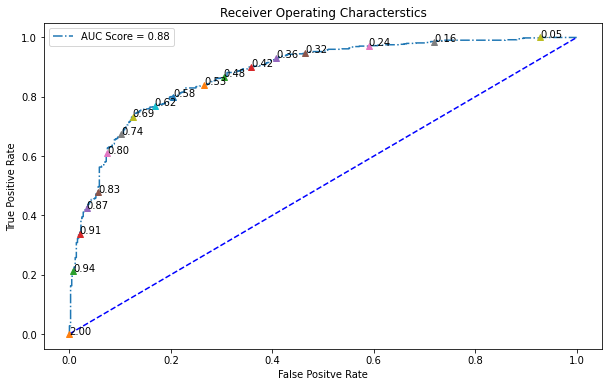

In [43]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [44]:
# save our machine learning model
import pickle

In [46]:
pickle.dump(model_best,open('./model/model_svm.pickle','wb'))

In [47]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))